<a href="https://colab.research.google.com/github/catianascimento/RCP209-ApprentissageStatistique2/blob/main/RCP209_Projet_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

The dataset is available on the page: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install biokit

     |████████████████████████████████| 162 kB 5.5 MB/s 
     |████████████████████████████████| 47 kB 3.2 MB/s 
     |████████████████████████████████| 1.0 MB 42.1 MB/s 
     |████████████████████████████████| 2.3 MB 31.3 MB/s 
     |████████████████████████████████| 51 kB 216 kB/s 
     |████████████████████████████████| 47 kB 3.9 MB/s 
     |████████████████████████████████| 144 kB 39.8 MB/s 
     |████████████████████████████████| 5.8 MB 21.4 MB/s 
     |████████████████████████████████| 251 kB 35.3 MB/s 
     |████████████████████████████████| 127 kB 38.3 MB/s 
  Created wheel for biokit: filename=biokit-0.5.0-py3-none-any.whl size=177148 sha256=83d4e17f070f2f54beddada91b0bf01b03f0bb9735d6ca4d12e997238cc4ba25
  Stored in directory: /root/.cache/pip/wheels/2f/30/fe/0a5e0df22f6ac201067237923fbad60309bb6f7dc68ff6b346
  Created wheel for bioservices: filename=bioservices-1.8.4-py3-none-any.whl size=231822 sha256=0ea64c15655f819dac2c888bd0c2683ae7eced53f224f7ddbf3465f5b0d3ba08
  Stored

In [3]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Counting missing data

In [4]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      diabetes.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Count number of Zeros in all Columns

In [5]:
# Count number of zeros in all columns of Dataframe
for column_name in diabetes.columns:
    column = diabetes[column_name]
    # Get the count of Zeros in column
    percent = (column == 0).sum()/len(diabetes) *100
    count = (column == 0).sum()
    print('Column ', column_name, ' has ', count, 'zeros (', percent,'%)')
    # print('Count of zeros in column ', column_name, ' is : ', count)

Column  Pregnancies  has  111 zeros ( 14.453125 %)
Column  Glucose  has  5 zeros ( 0.6510416666666667 %)
Column  BloodPressure  has  35 zeros ( 4.557291666666666 %)
Column  SkinThickness  has  227 zeros ( 29.557291666666668 %)
Column  Insulin  has  374 zeros ( 48.69791666666667 %)
Column  BMI  has  11 zeros ( 1.4322916666666665 %)
Column  DiabetesPedigreeFunction  has  0 zeros ( 0.0 %)
Column  Age  has  0 zeros ( 0.0 %)
Column  Outcome  has  500 zeros ( 65.10416666666666 %)


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Counting repeated rows in dataframe

In [7]:
db = diabetes.groupby(diabetes.columns.tolist(),as_index=False).size()
db[db['size']>1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,size


In [8]:
print(diabetes[diabetes.duplicated()])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


##Variables

In [9]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pearson Correlation

In [10]:
x = diabetes.drop('Outcome', axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y = diabetes['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#Exploratory Data Analysis (EDA)

Age

In [13]:
type(diabetes['Age'])

pandas.core.series.Series

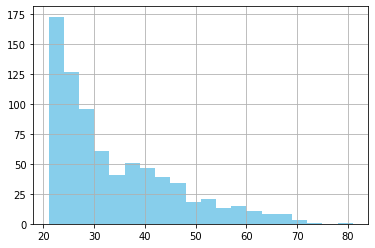

In [14]:
diabetes['Age'].hist(bins=20, color = "skyblue")
# plt.plot(round(diabetes['Age'].mean()), round(diabetes['Age'].mean()), color='g', label='cos')

Blood Pressure


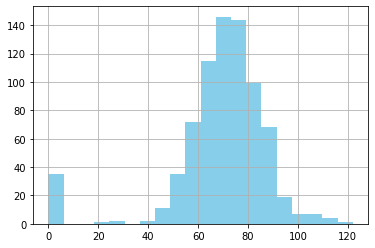

In [15]:
diabetes['BloodPressure'].hist(bins=20, color = "skyblue")

Skin Thickness

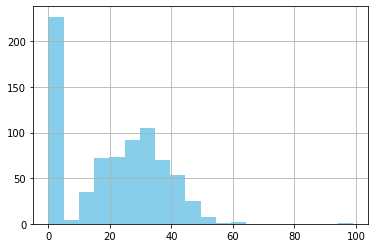

In [16]:
diabetes['SkinThickness'].hist(bins=20, color = "skyblue")

Insulin

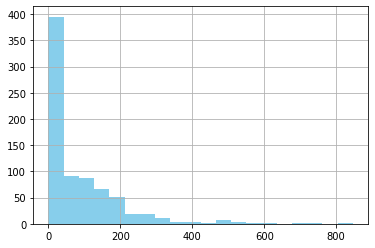

In [17]:
diabetes['Insulin'].hist(bins=20, color = "skyblue")

BMI

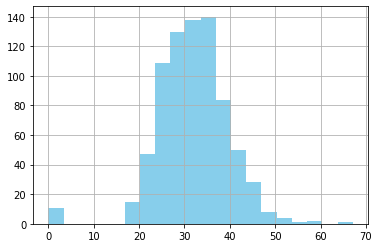

In [18]:
diabetes['BMI'].hist(bins=20, color = "skyblue")

DiabetesPedigreeFunction

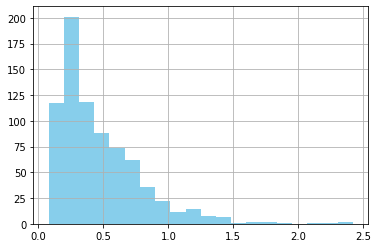

In [19]:
diabetes['DiabetesPedigreeFunction'].hist(bins=20, color = "skyblue")

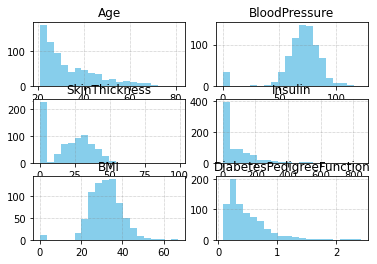

In [20]:
data = [diabetes['Age'], diabetes['BloodPressure'],diabetes['SkinThickness'], diabetes['Insulin'], diabetes['BMI'], diabetes['DiabetesPedigreeFunction']]
titles =['Age', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

f, a = plt.subplots(3,2)
a = a.ravel()

# fig = plt.figure(figsize=(12, 8))
for idx, ax in enumerate(a):
    ax.hist(data[idx], bins=20, color = "skyblue")
    ax.set_title(titles[idx],
             fontsize = 12)
    ax.grid(color='grey', linestyle=':', linewidth=0.5)

plt.show()
plt.rcParams["figure.figsize"] = (20,15)

In [21]:
from scipy.stats import shapiro
stat, p = shapiro(diabetes['BloodPressure'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics,p = 0.819, 0.000

Statistics=0.819, p=0.000


Blood Pressure - Replacing 0 values by the median

Text(0.5, 1.0, 'Blood Pressure')

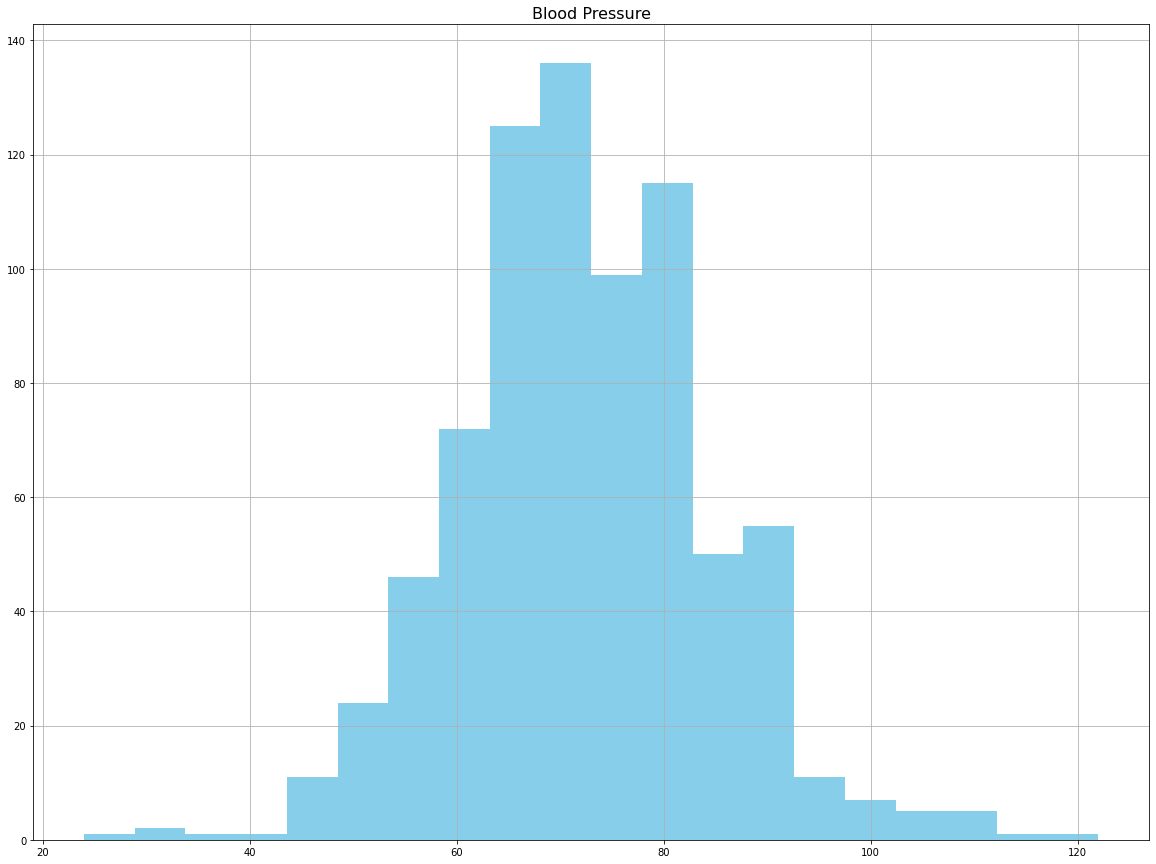

In [22]:
diabetes.loc[diabetes["BloodPressure"] == 0, "BloodPressure"] = diabetes["BloodPressure"].median()
diabetes['BloodPressure'].hist(bins=20, color = "skyblue")
# ax.set_title('Blood Pressure', fontsize = 12)
plt.rcParams["figure.figsize"] = (10,5)
plt.title("Blood Pressure", fontsize = 16)

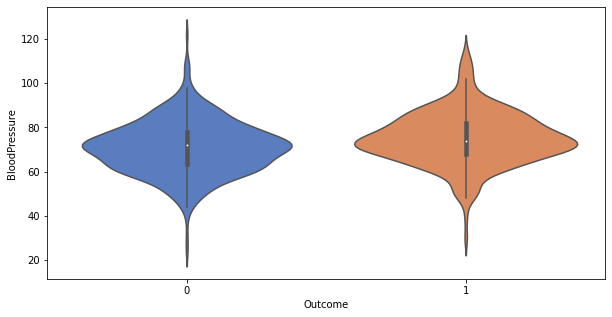

In [23]:
#Classifying the Blood Pressure based on class
ax = sns.violinplot(x='Outcome', y='BloodPressure', data=diabetes, palette='muted', split=True)

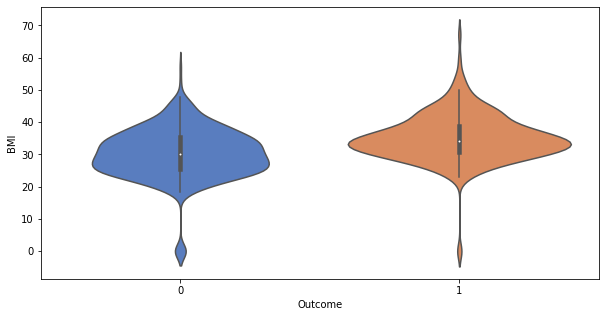

In [24]:
#Classifying the Blood Pressure based on class
ax = sns.violinplot(x='Outcome', y='BMI', data=diabetes, palette='muted', split=True)

BMI - Replacing 0 values by the median

Text(0.5, 1.0, 'BMI')

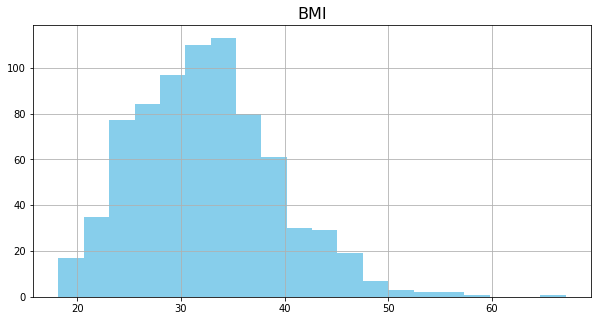

In [25]:
diabetes.loc[diabetes["BMI"] == 0, "BMI"] = diabetes["BMI"].median()
diabetes['BMI'].hist(bins=20, color = "skyblue")
# ax.set_title('Blood Pressure', fontsize = 12)
plt.rcParams["figure.figsize"] = (10,5)
plt.title("BMI", fontsize = 16)

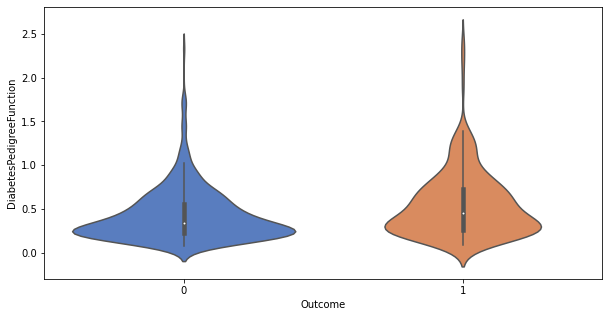

In [26]:
#Classifying the DiabetesPedigreeFunction based on class
ax = sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes, palette='muted', split=True)

Text(0.5, 1.0, 'Glucose')

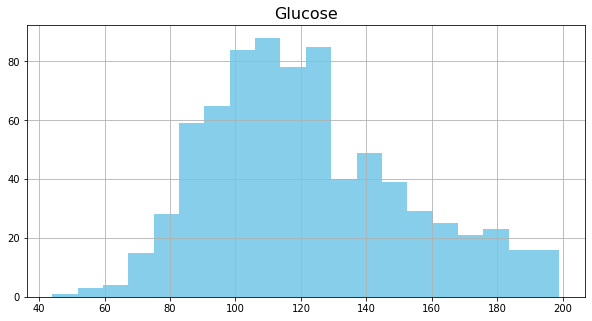

In [27]:
diabetes.loc[diabetes["Glucose"] == 0, "Glucose"] = diabetes["Glucose"].median()
diabetes['Glucose'].hist(bins=20, color = "skyblue")
# ax.set_title('Blood Pressure', fontsize = 12)
plt.rcParams["figure.figsize"] = (10,5)
plt.title("Glucose", fontsize = 16)

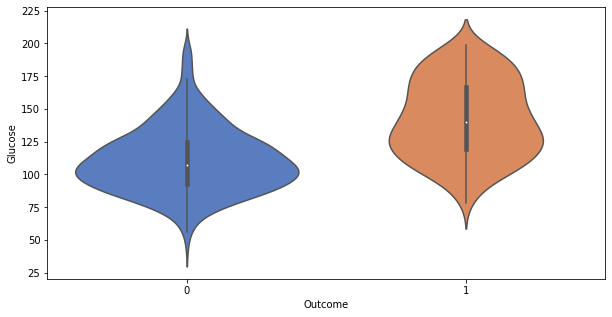

In [28]:
#Classifying the Glucose based on class
ax = sns.violinplot(x='Outcome', y='Glucose', data=diabetes, palette='muted', split=True)

Text(0.5, 1.0, 'Insulin')

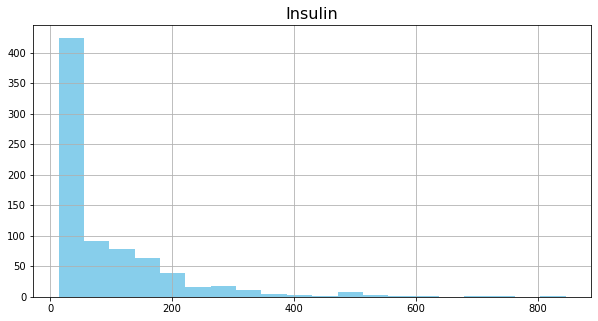

In [29]:
diabetes.loc[diabetes["Insulin"] == 0, "Insulin"] = diabetes["Insulin"].median()
diabetes['Insulin'].hist(bins=20, color = "skyblue")
# ax.set_title('Blood Pressure', fontsize = 12)
plt.rcParams["figure.figsize"] = (10,5)
plt.title("Insulin", fontsize = 16)

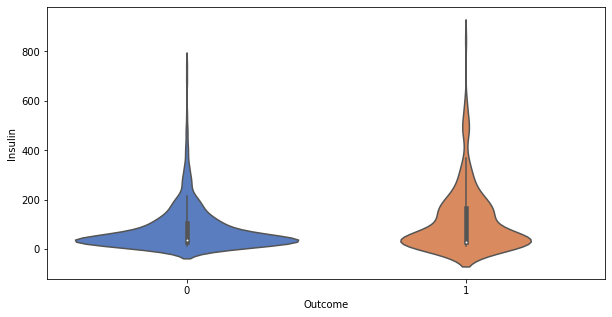

In [30]:
#Classifying the Insulin based on class
ax = sns.violinplot(x='Outcome', y='Insulin', data=diabetes, palette='muted', split=True)

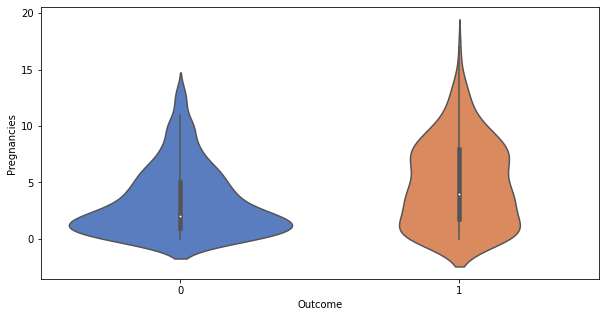

In [31]:
#Classifying the Pregnancies based on class
ax = sns.violinplot(x='Outcome', y='Pregnancies', data=diabetes, palette='muted', split=True)

Text(0.5, 1.0, 'SkinThickness')

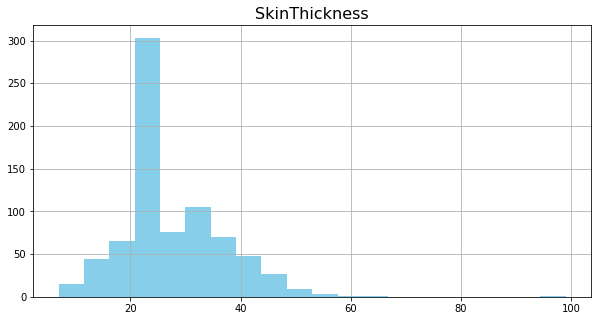

In [32]:
diabetes.loc[diabetes["SkinThickness"] == 0, "SkinThickness"] = diabetes["SkinThickness"].median()
diabetes['SkinThickness'].hist(bins=20, color = "skyblue")
# ax.set_title('Blood Pressure', fontsize = 12)
plt.rcParams["figure.figsize"] = (10,5)
plt.title("SkinThickness", fontsize = 16)

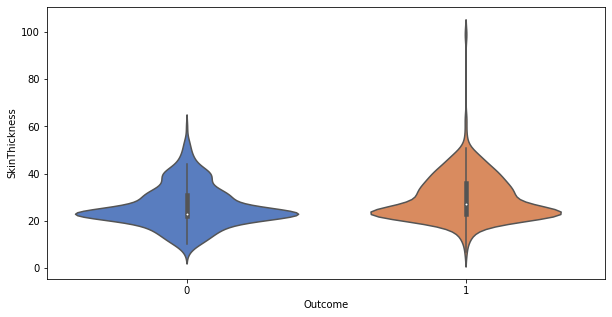

In [33]:
#Classifying the SkinThickness based on class
ax = sns.violinplot(x='Outcome', y='SkinThickness', data=diabetes, palette='muted', split=True)

Histogram

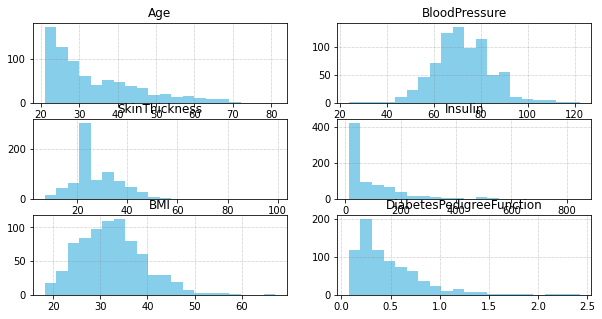

In [34]:
data = [diabetes['Age'], diabetes['BloodPressure'],diabetes['SkinThickness'], diabetes['Insulin'], diabetes['BMI'], diabetes['DiabetesPedigreeFunction']]
titles =['Age', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

f, a = plt.subplots(3,2)
a = a.ravel()

# fig = plt.figure(figsize=(12, 8))
for idx, ax in enumerate(a):
    ax.hist(data[idx], bins=20, color = "skyblue")
    ax.set_title(titles[idx],
             fontsize = 12)
    ax.grid(color='grey', linestyle=':', linewidth=0.5)

plt.show()
plt.rcParams["figure.figsize"] = (12,8)

Pearson Corrélation

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


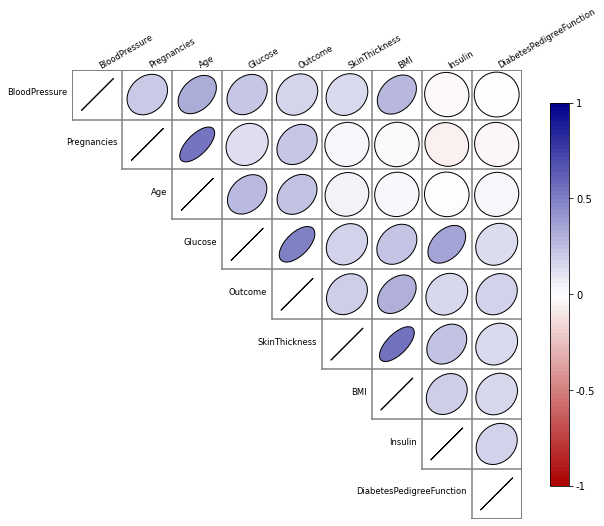

In [35]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

mtx_corr = diabetes.corr()

corr = corrplot.Corrplot(mtx_corr)
corr.plot(upper='ellipse')

fig = plt.gcf()
fig.set_size_inches(8,8)

plt.rcParams.update({'font.size': 16})
fig.show()

Splitting Train/Test data

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
SEED = 4121988

#Splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = SEED)

Text(0.5, 1.0, 'Histogram of ytrain')

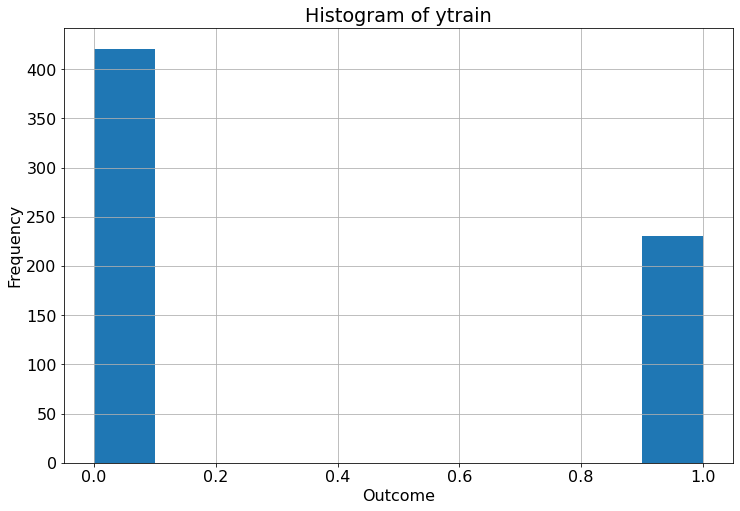

In [38]:
y_train.hist()
plt.ylabel('Frequency')
plt.xlabel('Outcome')
plt.title('Histogram of ytrain')

# Models

### Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=SEED)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [79]:
from sklearn.metrics import f1_score, precision_score, recall_score

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average='macro'))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))

Accuracy of logistic regression classifier on test set: 0.73
0.6854168489196046
0.6904591104734576
0.6816626753335615


### Support Vector Machine

In [80]:
from sklearn.svm import SVC

classifier_rbf = SVC(kernel = 'rbf', random_state=SEED)
classifier_rbf.fit(x_train, y_train)
y_pred = classifier_rbf.predict(x_test)
print('Accuracy of SVC (RBF) classifier on test set: {:.2f}'.format(classifier_rbf.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of SVC (RBF) classifier on test set: 0.72
0.6478178368121442
0.6791208791208792
0.6394115634621964


### Decision Tree Classifier

In [48]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=SEED, max_depth=3)

# clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(x_train, y_train)
y_pred = clf_tree.predict(x_test)

print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(clf_tree.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

# print("Arbre de décision : " + str(clf.score(x_test,y_test)))

Accuracy of Decision Tree Classifier on test set: 0.72
0.6651211617531274
0.6696556671449068
0.6618200478959972


###Bagging Classifier

In [72]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

clf_tree = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200, random_state=SEED)

# clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(x_train, y_train)
y_pred = clf_tree.predict(x_test)

print('Accuracy of Bagging Classifier (200 trees) on test set: {:.2f}'.format(clf_tree.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

# clf = RandomForestClassifier(n_estimators=200)
# clf.fit(x_train, y_train)
# Z = clf.predict(x_test)
# print("Forêt aléatoire (200 arbres) : " + str(clf.score(x_test,y_test)))

Accuracy of Bagging Classifier (200 trees) on test set: 0.73
0.6687240902809766
0.6899350649350648
0.6601094765651728


### Random Forest (200 trees)

In [82]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

clf_tree = RandomForestClassifier(random_state=SEED, n_estimators=200)

clf_tree.fit(x_train, y_train)
y_pred = clf_tree.predict(x_test)

print('Accuracy of Random Forest (200 trees) on test set: {:.2f}'.format(clf_tree.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))


Accuracy of Random Forest (200 trees) on test set: 0.74
0.687948350071736
0.7005692599620493
0.6808073896681491


### Random Forest(300 trees)

In [81]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt', random_state=SEED)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of Random Forest on test set: 0.75
0.7008980172490442
0.7113095238095238
0.6943209031816626


Features Importance

Feature: 0, Score: 0.08530
Feature: 1, Score: 0.27716
Feature: 2, Score: 0.08503
Feature: 3, Score: 0.06779
Feature: 4, Score: 0.07469
Feature: 5, Score: 0.16057
Feature: 6, Score: 0.11793
Feature: 7, Score: 0.13154


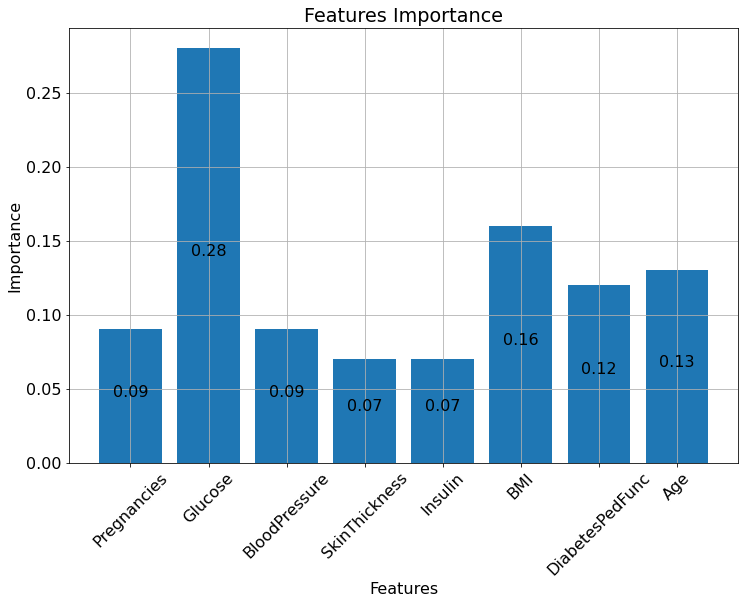

[0.09, 0.28, 0.09, 0.07, 0.07, 0.16, 0.12, 0.13]

In [118]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
  
rounded_importances=[]
for value in importance:
	rounded_importances.append(round(value,2))

def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.annotate(y_list[i],(i,y_list[i]/2),ha="center")

features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedFunc','Age']
plt.bar(features, rounded_importances)
add_value_label(features, rounded_importances)
plt.title("Features Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

rounded_importances

#GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(x_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(x_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.7327586206896551
max_samples: 0.4
max_features: 0.8


Construire le graphique accuracy vs n_estimators. Que constatez-vous ? A partir de quelle valeur on n’améliore plus

10 0.7327586206896551
20 0.7413793103448276
30 0.7241379310344828
40 0.7413793103448276
50 0.7413793103448276
60 0.75
70 0.7413793103448276
80 0.7241379310344828
90 0.7327586206896551
100 0.7241379310344828
110 0.75
120 0.7155172413793104
130 0.7327586206896551
140 0.7586206896551724
150 0.7241379310344828
160 0.75
170 0.7327586206896551
180 0.7327586206896551
190 0.7241379310344828
200 0.7155172413793104
210 0.7241379310344828
220 0.75
230 0.7068965517241379
240 0.7327586206896551
250 0.7413793103448276
260 0.7241379310344828
270 0.7327586206896551
280 0.7413793103448276
290 0.7241379310344828
300 0.7241379310344828


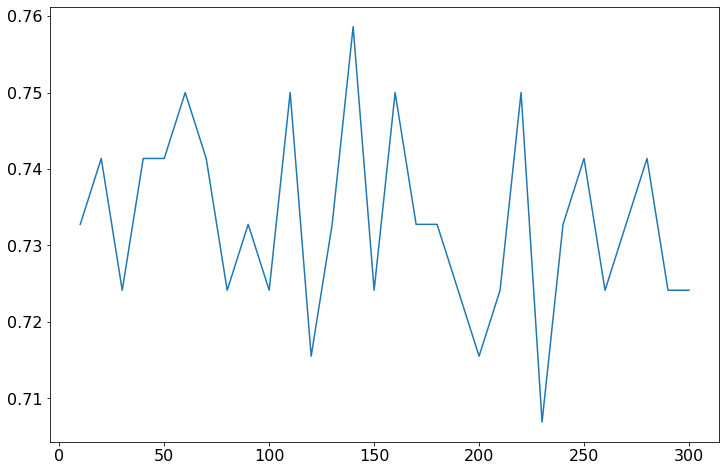

In [ ]:
N = 30
accuracy = []

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(x_train, y_train)
    accuracy.append(clf.score(x_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

Les Extra-Trees (Extremely Randomized Trees) randomisent encore plus la construction de l’arbre et sont utilisés surtout pour des données numériques. Par rapport aux forêts aléatoires, ils abandonnent l’utilisation des échantillons de bootstrap et pour chaque feature candidat choisissent un seuil de coupure aléatoire. L’idée fonctionne plutôt bien pour de problèmes d’apprentissage qui ont un grand nombre de features qui varient de manière continue. Souvent leur taux d’erreur est supérieur aux forêts aléatoires, le temps de calcul plus faible et les arbres générés sont plus grands.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

import numpy as np

clf = RandomForestClassifier(n_estimators=50)
clf.fit(x_train, y_train)
accuracy=clf.score(x_test,y_test)
print("Forêt aléatoire : " + str(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(x_train, y_train)
accuracy = clf.score(x_test,y_test)
print("Extra Trees : " + str(accuracy))

Forêt aléatoire : 0.7068965517241379
Extra Trees : 0.7413793103448276


#Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.75


Le paramètre max_depth contrôle la profondeur de l’arbre. Essayez plusieurs valeurs pour voir l’impact de l’utilisation d’un classifieur faible vs plus fort (max_depth élevé ou éliminer le paramètre). Testez aussi l’effet du paramètre learning_rate et le nombre de classifieurs.

RESPONSE:

max_depth féible génère des arbres peu profonds qui ont tendance à généraliser mal. max_dept élevé génère des arbres trop profonds (sur-apprentissage) d’où encore une mauvaise généralisation :

(max_dept, accuracy) : (2, 0.70), (3, 0.85), (4, 0.87), (5, 0.89), (10, 0.95), (15, 0.80)

Par contre, un mauvais classifieur faible (par exemple max_depth = 2) peut etre compensé par un parametre n_estimators plus grand : n_estimators = 30 donne accuracy = 0.85, n_estimators = 300 donne accuracy = 0.95.

Une valeur plus faible de learning_rate permet d’améliorer le score, mais pas au-delà d’une certaine valeur : learning_rate = 2 donne accuracy = 0.89, learning_rate = 0.1 donne accuracy = 0.93 mais learning_rate = 0.1 ne change plus le taux d’erreurs.